# Reference Manager Citation Errors

12-18-23 KV
2-20-23 KV


In [78]:
# Import needed packages

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [135]:
# Read data from where it's entered into CSV

filepath = '/Users/kvrouwenvelder/Library/CloudStorage/OneDrive-AmericanGeophysicalUnion/Documents/Data/Reference-Manager-Work/reference-manager-analysis/'
filename = 'reference-manager-data-v2-'
reference_manager_filenames = ['BibTeX','repo-recommended-citation','Zotero-plugin','Zotero-wizard','BibDesk','Sciwheel-plugin',
                               'SciWheel-wizard','CrossCite','Endnote','Papers-plugin','Papers-wizard','Paperpile-plugin',
                               'Paperpile-wizard','Mendeley-plugin','Mendeley-wizard','RefWorks','Export-options']

# import files
bibtex = pd.read_csv(filepath+filename+reference_manager_filenames[0]+'.csv')
repo_recommended_citation = pd.read_csv(filepath+filename+reference_manager_filenames[1]+'.csv')
zotero_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[2]+'.csv')
zotero_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[3]+'.csv')
bib_desk = pd.read_csv(filepath+filename+reference_manager_filenames[4]+'.csv')
sciwheel_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[5]+'.csv')
sciwheel_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[6]+'.csv')
crosscite = pd.read_csv(filepath+filename+reference_manager_filenames[7]+'.csv')
endnote = pd.read_csv(filepath+filename+reference_manager_filenames[8]+'.csv')
papers_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[9]+'.csv')
papers_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[10]+'.csv')
paperpile_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[11]+'.csv')
paperpile_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[12]+'.csv')
mendeley_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[13]+'.csv')
mendeley_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[14]+'.csv')
refworks = pd.read_csv(filepath+filename+reference_manager_filenames[15]+'.csv')
export_options = pd.read_csv(filepath+filename+reference_manager_filenames[16]+'.csv')

list_of_ref_managers = [bibtex,repo_recommended_citation,zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin,
                       sciwheel_wizard,crosscite, endnote, papers_plugin,papers_wizard,paperpile_plugin,
                       paperpile_wizard,mendeley_plugin,mendeley_wizard,refworks]


# Functions

In [175]:
# Set up input fields

# Define export metadata fields for count_fields

ex_cols = ['export-meta-type', 'export-meta-authors','export-meta-title','export-meta-date','export-meta-DOI',
            'export-meta-repo','export-meta-version','export-meta-access-date']

# Define import metadata fields for count_fields
im_cols = ['import-meta-type', 'import-meta-authors','import-meta-title','import-meta-date','import-meta-DOI',
            'import-meta-repo','import-meta-version','import-meta-access-date']


In [176]:
# Count correct, missing, incorrect metadata fields for each repository and reference manager (add cols to df)

def count_fields(input_df,cols,col_type):
    input_df['count_incorrect_'+col_type]=input_df[cols].sum(axis=1) # add a column to df with count "incorrect"
    input_df['count_missing_'+col_type]= input_df[cols].isna().sum(axis=1) # add a column to df with count 'missing'
    # The count correct is len(cols) - (# incorrect + # missing)
    input_df['count_correct_'+col_type] = len(cols) - (input_df['count_incorrect_'+col_type]+input_df['count_missing_'+col_type])
    return input_df


In [177]:
# Count correct, missing, incorrect across all reference managers

list_of_dfs = (repo_recommended_citation, zotero_plugin, zotero_wizard)

def sum_across_repos(list_of_dfs, cols, col_type): 
    # list_of_dfs is df names you wish to analyze; cols is list of columns to analyze; col_type is "ex" or "im"
    
    # init full sums
    full_sums = [np.zeros(len(list_of_dfs)), np.zeros(len(list_of_dfs)), np.zeros(len(list_of_dfs))]

    iter = 0 #start counter
    
    for df in list_of_dfs: # go through list of dfs
        count_fields(df, cols, col_type)
        sum_incorrect = np.sum(df['count_incorrect_' + col_type])
        sum_missing = np.sum(df['count_missing_' + col_type])
        sum_correct = np.sum(df['count_correct_' + col_type])
        sums = [sum_incorrect, sum_missing, sum_correct]
        full_sums[iter] = sums
        iter += 1
    
    return full_sums
    
# print(full_sums[0][1]) # access an individual element in this list using list[rows][columns]


# Repository recommended citation
* How many repositories offer a recommended citation? 
* How many repositories offer a recommended citation that is correct when compared to DataCite metadata?
* How many repositories define a citation style? 
* How many repositories offer an opportunity to change the citation style to what journal requires?

3 repositories specify a citation style (APA).


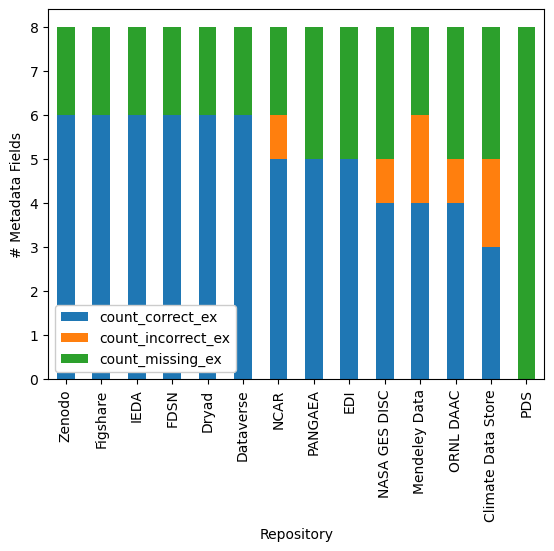

In [159]:
# Count the correct , incorrect, missing fields - Export Only
count_fields(repo_recommended_citation, ex_cols,'ex')

# How many repositories specify citation style?

num_repo_citation_style = len(repo_recommended_citation[repo_recommended_citation['Citation-style']=='APA'])
print(str(num_repo_citation_style)+' repositories specify a citation style (APA).')

# Create a stacked bar graph with correct, incorrect, missing fields for each repository

## Sort df by most correct fields

## Start graphing
ax = repo_recommended_citation.sort_values(by=['count_correct_ex'],ascending = False).plot.bar(x = 'Repository', y = ['count_correct_ex','count_incorrect_ex','count_missing_ex'], stacked = True)
plt.ylabel('# Metadata Fields')

#plt.legend(lines[:3],['Correct Fields','Incorrect Fields','Missing Fields'])
ax.legend(loc = 'lower left',framealpha=1)

# need to adjust colors, font sizes, rotation of x labels, graph shape, etc.

# Graph correct fields across all repositories
* For each reference manager, what are the # of correct fields across all repositories?
